## Import thư viện

In [ ]:
!pip install numpy==1.24.4 scikit-learn==1.3.2 joblib==1.4.2

In [ ]:
import numpy, sklearn
print("numpy version:", numpy.__version__)
print("scikit-learn version:", sklearn.__version__)

numpy version: 1.24.4
scikit-learn version: 1.3.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Xử lý dữ liệu

Đọc và hiển thị  file CSV

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   datapath_id               int64  
 2   flow_id                   object 
 3   ip_src                    object 
 4   tp_src                    int64  
 5   ip_dst                    object 
 6   tp_dst                    int64  
 7   ip_proto                  int64  
 8   icmp_code                 int64  
 9   icmp_type                 int64  
 10  flow_duration_sec         int64  
 11  flow_duration_nsec        int64  
 12  idle_timeout              int64  
 13  hard_timeout              int64  
 14  flags                     int64  
 15  packet_count              int64  
 16  byte_count                int64  
 17  packet_count_per_second   float64
 18  packet_count_per_nsecond  float64
 19  byte_count_per_second     float64
 20  byte_count_per_nsecond  

Tách đặc trưng và nhãn

In [ ]:
X = df.drop(['timestamp', 'datapath_id','flow_id', 'label'], axis=1)
y = df['label']

Chuẩn hoá dữ liệu

In [ ]:
X

,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
0,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00000,1.057833e-04,8.378040e+05,6.981700e-03
1,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00000,4.307819e-04,2.958744e+09,2.435180e+01
2,10.0.0.3,54246,10.0.0.5,5050,1,0,8,4,484000000,20,100,0,3,294,0.75000,6.198347e-09,7.350000e+01,6.074380e-07
3,10.0.0.5,54246,10.0.0.3,5050,1,0,0,4,415000000,20,100,0,3,294,0.75000,7.228916e-09,7.350000e+01,7.084337e-07
4,10.0.0.3,0,10.0.0.5,0,1,0,8,4,423000000,20,100,0,3,294,0.75000,7.092199e-09,7.350000e+01,6.950355e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667518,10.0.0.11,0,10.0.0.1,0,1,0,0,92,560000000,20,100,0,91,8918,0.98913,1.625000e-07,9.693478e+01,1.592500e-05
2667519,10.0.0.1,0,10.0.0.11,0,1,0,8,92,563000000,20,100,0,91,8918,0.98913,1.616341e-07,9.693478e+01,1.584014e-05
2667520,10.0.0.11,0,10.0.0.1,0,1,0,0,92,558000000,20,100,0,91,8918,0.98913,1.630824e-07,9.693478e+01,1.598208e-05
2667521,10.0.0.1,0,10.0.0.11,0,1,0,8,92,565000000,20,100,0,91,8918,0.98913,1.610619e-07,9.693478e+01,1.578407e-05


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    object 
 1   tp_src                    int64  
 2   ip_dst                    object 
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(12), object(2)
memory usage: 366.3+ MB


In [ ]:
X['ip_src'] = X['ip_src'].str.replace('.', '').astype('int64')
X['ip_dst'] = X['ip_dst'].str.replace('.', '').astype('int64')

In [ ]:
X

,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
0,10001,5050,10003,54246,6,-1,-1,4,480000000,20,100,0,50776,3351216,12694.00000,1.057833e-04,8.378040e+05,6.981700e-03
1,10003,54246,10001,5050,6,-1,-1,4,486000000,20,100,0,209360,11834974848,52340.00000,4.307819e-04,2.958744e+09,2.435180e+01
2,10003,54246,10005,5050,1,0,8,4,484000000,20,100,0,3,294,0.75000,6.198347e-09,7.350000e+01,6.074380e-07
3,10005,54246,10003,5050,1,0,0,4,415000000,20,100,0,3,294,0.75000,7.228916e-09,7.350000e+01,7.084337e-07
4,10003,0,10005,0,1,0,8,4,423000000,20,100,0,3,294,0.75000,7.092199e-09,7.350000e+01,6.950355e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667518,100011,0,10001,0,1,0,0,92,560000000,20,100,0,91,8918,0.98913,1.625000e-07,9.693478e+01,1.592500e-05
2667519,10001,0,100011,0,1,0,8,92,563000000,20,100,0,91,8918,0.98913,1.616341e-07,9.693478e+01,1.584014e-05
2667520,100011,0,10001,0,1,0,0,92,558000000,20,100,0,91,8918,0.98913,1.630824e-07,9.693478e+01,1.598208e-05
2667521,10001,0,100011,0,1,0,8,92,565000000,20,100,0,91,8918,0.98913,1.610619e-07,9.693478e+01,1.578407e-05


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667523 entries, 0 to 2667522
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ip_src                    int64  
 1   tp_src                    int64  
 2   ip_dst                    int64  
 3   tp_dst                    int64  
 4   ip_proto                  int64  
 5   icmp_code                 int64  
 6   icmp_type                 int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        int64  
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  flags                     int64  
 12  packet_count              int64  
 13  byte_count                int64  
 14  packet_count_per_second   float64
 15  packet_count_per_nsecond  float64
 16  byte_count_per_second     float64
 17  byte_count_per_nsecond    float64
dtypes: float64(4), int64(14)
memory usage: 366.3 MB


In [ ]:
y.value_counts()

,count
label,
1,1760670
0,906853


In [ ]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (2667523, 18)
y: (2667523,)


Chia dữ liệu thành thành tập huấn luyện và tập kiểm thử

> Add blockquote



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=28)

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
print(f"Train: {X_train.shape} {y_train.shape}")
print(f"Val: {X_val.shape} {y_val.shape}")

Train: (1867266, 18) (1867266,)
Val: (800257, 18) (800257,)


## Xây dựng mô hình

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=1e-3,
    warm_start=True,
    max_iter=1,
    shuffle=True,
    random_state=42
)

## Huấn luyện mô hình

In [ ]:
max_epochs = 200
patience   = 5
no_improve = 0
best_val_loss = np.inf
classes = np.unique(y_train)

In [ ]:
train_losses = []
val_losses   = []
train_accs   = []
val_accs     = []

for epoch in range(1, max_epochs+1):
    model.fit(X_train, y_train)

    train_loss = model.loss_
    train_acc  = accuracy_score(y_train, model.predict(X_train))
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    y_val_proba = model.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_proba, labels=classes)
    val_acc  = accuracy_score(y_val, model.predict(X_val))
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch:03d} | "
          f"Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f} | "
          f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

    if val_loss + 1e-4 < best_val_loss:
        best_val_loss = val_loss
        no_improve   = 0
        joblib.dump(model, 'best_mlp.pkl')
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"⏹ Early stopping tại epoch {epoch}")
            break

Epoch 001 | Train Loss=0.4198, Val Loss=0.1903 | Train Acc=0.9947, Val Acc=0.9947
Epoch 002 | Train Loss=0.2140, Val Loss=0.2226 | Train Acc=0.9939, Val Acc=0.9938
Epoch 003 | Train Loss=0.1724, Val Loss=0.3745 | Train Acc=0.9896, Val Acc=0.9896
Epoch 004 | Train Loss=0.1777, Val Loss=0.1109 | Train Acc=0.9970, Val Acc=0.9969
Epoch 005 | Train Loss=0.1519, Val Loss=0.2843 | Train Acc=0.9921, Val Acc=0.9921
Epoch 006 | Train Loss=0.1450, Val Loss=0.1538 | Train Acc=0.9957, Val Acc=0.9957
Epoch 007 | Train Loss=0.1400, Val Loss=0.1745 | Train Acc=0.9952, Val Acc=0.9952
Epoch 008 | Train Loss=0.1502, Val Loss=0.1041 | Train Acc=0.9972, Val Acc=0.9971
Epoch 009 | Train Loss=0.1543, Val Loss=0.0775 | Train Acc=0.9978, Val Acc=0.9978
Epoch 010 | Train Loss=0.1351, Val Loss=0.0786 | Train Acc=0.9977, Val Acc=0.9978
Epoch 011 | Train Loss=0.1287, Val Loss=0.1242 | Train Acc=0.9966, Val Acc=0.9966
Epoch 012 | Train Loss=0.1254, Val Loss=0.0625 | Train Acc=0.9982, Val Acc=0.9983
Epoch 013 | Trai

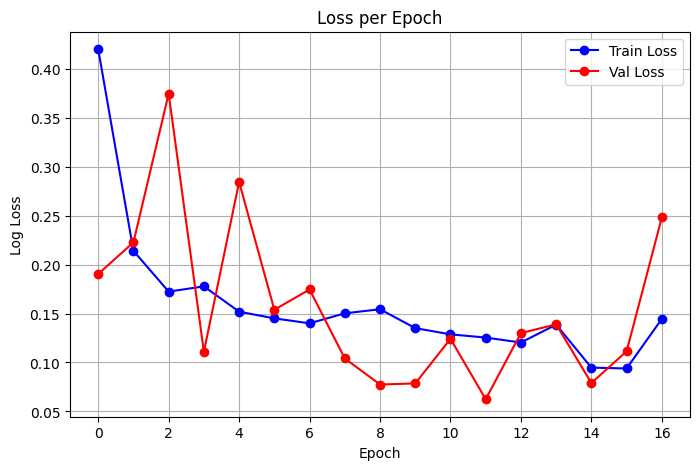

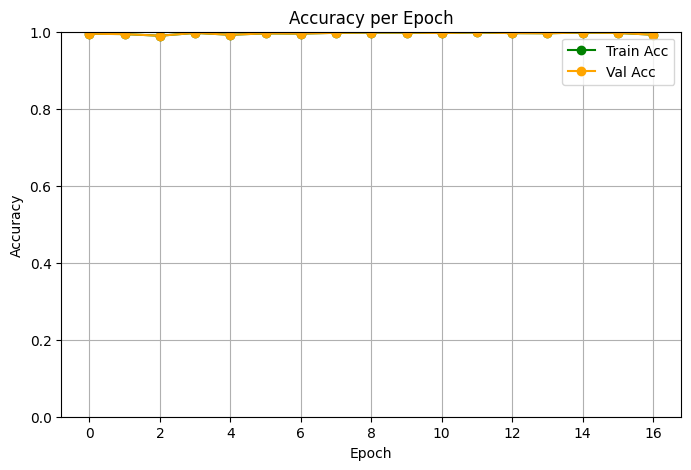

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(train_losses, marker='o', label='Train Loss', color='blue')
plt.plot(val_losses,   marker='o', label='Val Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8,5))
plt.plot(train_accs, marker='o', label='Train Acc', color='green')
plt.plot(val_accs,   marker='o', label='Val Acc', color='orange')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

## Tải lại mô hình và đánh giá

In [ ]:
test_model = joblib.load('/content/best_mlp.pkl')

In [ ]:
y_pred = test_model.predict(X_val)

print("confusion matrix")
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("Accuracy = {0:.2f} %".format(accuracy_score(y_val, y_pred)*100))
print("Precision score = {0:.2f} %".format(precision_score(y_val, y_pred)*100))
print("Recall score = {0:.2f} %".format(recall_score(y_val, y_pred)*100))
print("F1 score = {0:.2f} %".format(f1_score(y_val, y_pred)*100))
print("AUC score = {0:.2f} %".format(roc_auc_score(y_val, y_pred)*100))

confusion matrix
[[270716   1124]
 [   275 528142]]
Accuracy = 99.83 %
Precision score = 99.79 %
Recall score = 99.95 %
F1 score = 99.87 %
AUC score = 99.77 %


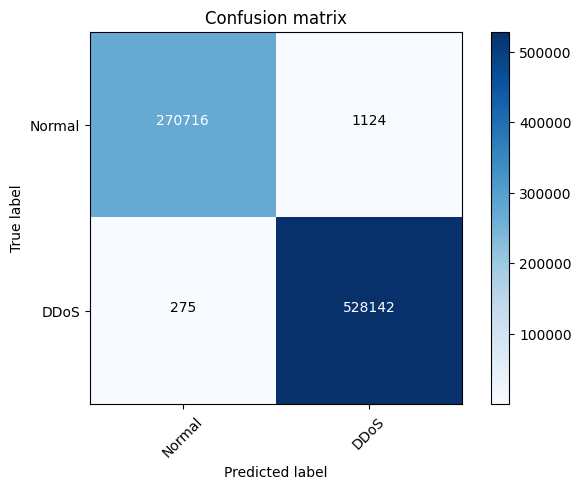

In [ ]:
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'DDoS'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'DDoS'])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

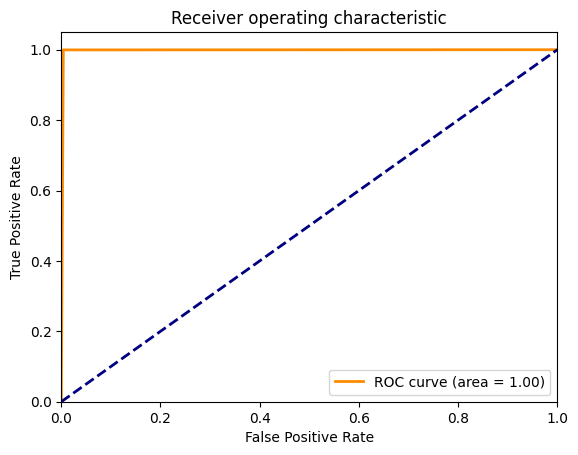

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()